# MRI Modalities

MRI is versatile. Tuning the MRI scanner in different ways allows us to generate images that are sensitive to varying underlying biological properties. This is done by creating contrast between tissue types.

## Image Contrast

MRI scans are acquired using a combination of magnetic fields and radiofrequency pulses. While inside the magnetic field in the scanner, radiofrequency pulses transmit energy to tissues within the brain. These tissues then emit energy differently depending on unique tissue properties and produce different signal intensities. These varying signal intensities in the MR image create a contrast. This contrast allows us to distinguish between different tissue types. 

See this short [video](https://www.youtube.com/watch?v=1CGzk-nV06g) for a visual explanation.

Various contrasts can be created by tuning the MRI scanner in different ways using **MRI sequences**. Different MRI sequences provide unique information regarding the underlying biological properties. We often call these **MRI modalities**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting
import pandas as pd
import matplotlib as mpl
import seaborn as sns

## T1-weighted and T2-weighted MRI

The time taken for energy to be emitted is called **relaxation time** and varies between tissues. This can be broadly broken down into two types:

### T1 relaxation
The longitudinal relaxation time (T1) is the time taken for protons in the tissue to emit energy while realigning with the main magnetic field.  

### T2 relaxation
The transverse relaxation time (T2) is the time taken for protons in the tissue to emit energy while losing coherence (i.e. moving out of time with each other).

<br>

This is a complex topic that we cannot cover in detail here. If you would like more detail, this [review article](https://pmj.bmj.com/content/89/1050/209) is a good place to start.

MRI sequences can be *weighted* towards T1 or T2 relaxation properties to produce unique image contrasts.



### Visualising MRI Contrast

Lets generate some example MRI signals from known T1 and T2 relaxation times.

In [3]:
# These functions return the MRI signal relating to T1 (Mz) and T2 (Mxy)

def get_Mz(T1, t, M_eq=1):
    Mz = M_eq * (1 - np.exp(-t/T1)) 
    return Mz

def get_Mxy(T2, t, Mxy_0=1):
    Mxy = Mxy_0 * np.exp(-t/T2)
    return Mxy


In [19]:
# state some known T1 and T2 relaxation times for different tissues:
# GM = Grey matter
# WM = White matter
# CSF = Cerebrospinal fluid
T1_dict = {'GM':1200, 'WM':800, 'CSF':4000, 'Bone':500}  
T2_dict = {'GM':110, 'WM':80, 'CSF':750, 'Bone':50}

T1_duration = np.arange(0,4500,500)
T2_duration = np.arange(0,500,100)

relax_df = pd.DataFrame()

# Use functions above to generate example MR signals for T1 and T2

# T1 signal
for tissue,T1 in T1_dict.items():
    _df = pd.DataFrame()
    Mz = get_Mz(T1,T1_duration)
    _df['time'] = T1_duration
    _df['signal'] = Mz
    _df['relaxation'] = 'T1'
    _df['tissue'] = tissue

    relax_df = pd.concat([relax_df, _df])

# T2 signal
for tissue,T2 in T2_dict.items():
    _df = pd.DataFrame()
    Mz = get_Mxy(T2,T2_duration)
    _df['time'] = T2_duration
    _df['signal'] = Mz
    _df['relaxation'] = 'T2'
    _df['tissue'] = tissue

    relax_df = pd.concat([relax_df, _df])

In [20]:
# look at the table we created
relax_df.head()

,time,signal,relaxation,tissue
0,0,0.000000,T1,GM
1,500,0.340759,T1,GM
2,1000,0.565402,T1,GM
3,1500,0.713495,T1,GM
4,2000,0.811124,T1,GM


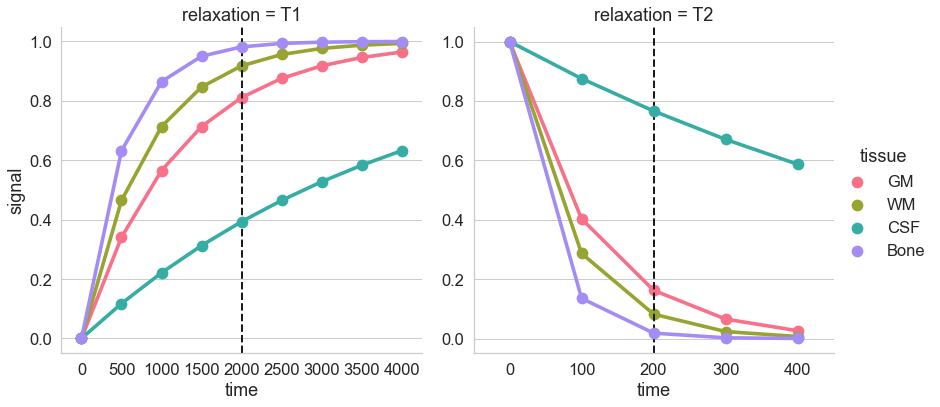

In [15]:
# plot these to visualise different relaxation properties for each tissue
plot_df = relax_df.copy()
T1_TE = 4
T2_TE = 2

sns.set(font_scale = 1.5)
mpl.rcParams['lines.linewidth'] = 2
palette = sns.color_palette("husl", 4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y='signal',x='time', hue='tissue', col='relaxation', kind='point', data=plot_df, palette=palette, height=6, aspect=1, sharey=False, sharex=False)
    
    ax1, ax2 = g.axes[0]
    ax1.axvline(x=T1_TE, label='Echo Time', c='k', linestyle='--')
    ax2.axvline(x=T2_TE, label='Echo Time', c='k', linestyle='--')


Higher signal relates to brighter voxels in an image. Can you tell which tissue type would be brightest and darkest on a T1-weighted and T2-weighted image?

### Visualisation T1w and T2w Images

Lets use a dataset we have already downloaded.

- [Craving dataset](https://openneuro.org/datasets/ds003242/versions/1.0.0): Cue Induced Craving task following food fasting, social isolation and baseline

In [18]:
local_data_dir = '../local_data/1_sMRI_modalities/'


T1_filename = local_data_dir + 'craving_sub-SAXSISO01b_T1w.nii.gz'
T2_filename = local_data_dir +'craving_sub-SAXSISO01b_T2w.nii.gz'      


### Read T1w and T2w anatomical images

In [7]:
T1_img = nib.load(T1_filename)
T2_img = nib.load(T2_filename)

# grab data array
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

print('T1 image path: {},\n\timage shape: {}'.format(T1_filename, T1_img.shape))
print('\tintensity value range: min: {:3.2f}, max: {:3.2f}'.format(np.min(T1_data.ravel()),np.max(T1_data.ravel())))
print('\nT2 image path: {},\n\timage shape: {}'.format(T2_filename, T2_img.shape))
print('\tintensity value range: min: {:3.2f}, max: {:3.2f}'.format(np.min(T2_data.ravel()),np.max(T2_data.ravel())))


T1 image path: ../local_data/1_sMRI_modalities/craving_sub-SAXSISO01b_T1w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.00, max: 526.00

T2 image path: ../local_data/1_sMRI_modalities/craving_sub-SAXSISO01b_T2w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.00, max: 326.00


### Visualize image
 - Single slice from three views: Coronal, Sagittal, Axial

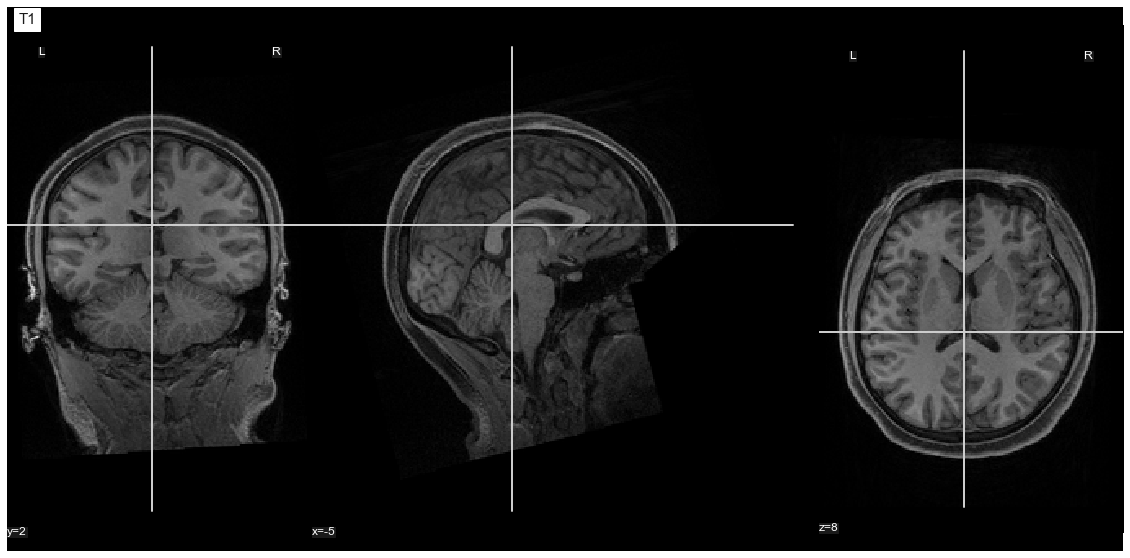

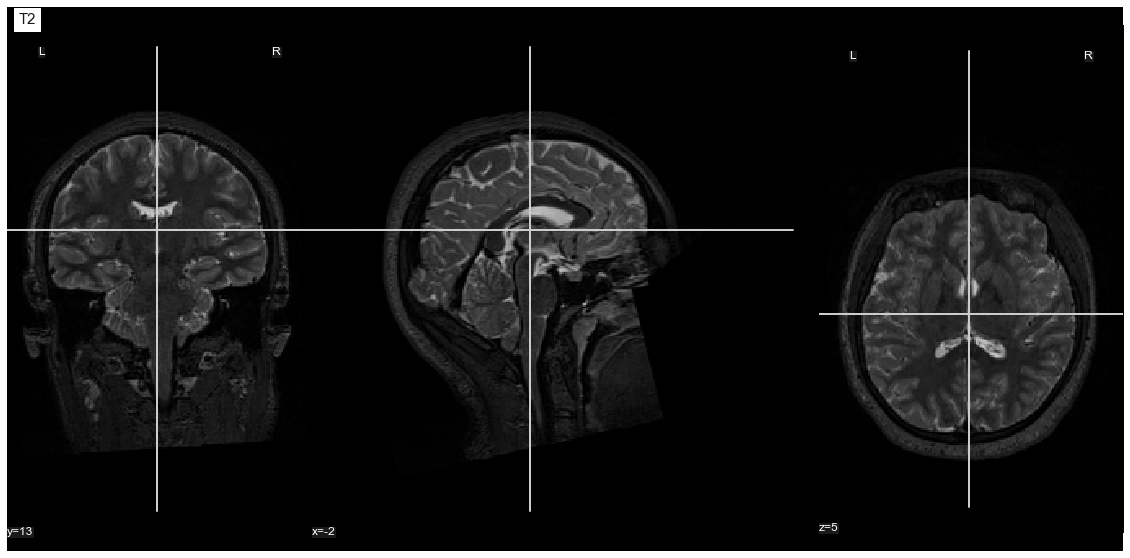

In [9]:
fig, ax1 = plt.subplots(figsize=(20,10))
plotting.plot_anat(T1_filename, title="T1", vmax=500, axes=ax1)

fig, ax2 = plt.subplots(figsize=(20,10))
plotting.plot_anat(T2_filename, title="T2", vmax=300, axes=ax2)

### Visualize image
 - Slice montage from three views: Coronal, Sagittal, Axial

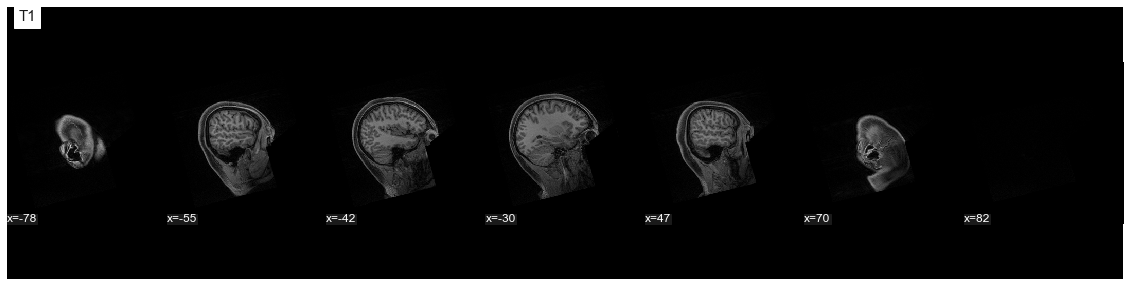

In [11]:
fig, ax = plt.subplots(figsize=(20,5))

plotting.plot_anat(T1_filename, title="T1", display_mode='x', vmax=500, axes=ax)

## Dataset

### For neuroimaging studies, a good practice is to use Brain Imaging Data Structure (BIDS) to organize imaging dataset
- See this [paper](https://www.nature.com/articles/sdata201644) and [starter-kit](https://github.com/bids-standard/bids-starter-kit/wiki) for more details
- See this [tutorial](https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI) for a BIDS carpentry lesson 


### In this tutorial we will use a subset of a dataset from [OpenNeuro](https://openneuro.org/datasets/ds003242/versions/1.0.0) which is saved in a local_data_dir

### OpenNeuro Dataset:


<img src="../fig/episode_1/Craving_OpenNeuro.png" width="1000">